In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from scipy import stats

In [36]:
# definimos función test de normalidad
def normality_test(data):
    alpha = 0.05
    stat, p = stats.shapiro(data)
    if p > alpha:
        print(f"Distribución Normal, p_value: {p} - stat: {stat}")
    else:
        print(f"Distibución NO Normal, p_value: {p} - stat: {stat}")

In [37]:
# Load the data
df_resultado = pd.read_csv('../Data/df_resultado_var1(vec).csv')
df_com_up = pd.read_csv('../Data/df_com_up_var1.csv')
df_com_down = pd.read_csv('../Data/df_com_down_var1.csv')
df_estadisticas_up = pd.read_csv('../Data/df_estadisticas_up.csv', index_col=0)
df_estadisticas_down = pd.read_csv('../Data/df_estadisticas_down.csv', index_col=0)
df_estadisticas = pd.read_csv('../Data/df_estadisticas.csv', index_col=0)

In [38]:
df_resultado.head()

,prediction,year_2023,year_2024,month_3,month_5,month_6,month_7,month_8,month_9,month_10,...,CAT 797-F,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930ER-MT,Kom.980E5,Komatsu AHS,status
0,125045.860483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.276360,-0.21334,-0.575556,2.735792,-1.756724,0.476865,-0.035749,-2.98167,-0.101592,no_cumple
1,133832.488037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.276360,-0.21334,-0.575556,2.735792,0.191462,0.433466,-0.035749,-2.98167,-0.101592,no_cumple
2,142875.385561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.246214,-0.21334,-0.575556,2.735792,0.191462,0.607062,-0.035749,-2.98167,-0.101592,cumple
3,142712.362782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.914614,-0.21334,-0.575556,2.735792,-1.756724,0.520264,-0.035749,-2.98167,-0.101592,cumple
4,144366.298793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.914614,-0.21334,-0.575556,2.735792,0.191462,0.520264,-0.035749,-2.98167,-0.101592,cumple


In [39]:
print(df_com_up.columns)

Index(['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_10', 'day_11', 'day_13',
       'day_15', 'day_16', 'day_17', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_30', 'day_31',
       'shift_B', 'crew_E2', 'crew_E3', 'crew_E4', 'efectivo', 'mantencion',
       'mecanica', 'electrica', 'mant_excl', 'mec_excl', 'demora', 'r_noprg',
       'waiting', 'queued', 'distance_down_level', 'distance_up',
       'distance_up_level', 'expected_time', 'lift_down', 'lift_down_level',
       'lift_up', 'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC',
       'KOM-CHQ', 'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT',
       'Kom.980E5', 'Komatsu AHS', 'truck_avail', 'payload_validation'],
      dtype='object')


In [40]:
print(df_com_down.columns)

Index(['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_10', 'day_11', 'day_13',
       'day_15', 'day_16', 'day_17', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_30', 'day_31',
       'shift_B', 'crew_E2', 'crew_E3', 'crew_E4', 'efectivo', 'mantencion',
       'mecanica', 'electrica', 'mant_excl', 'mec_excl', 'demora', 'r_noprg',
       'waiting', 'queued', 'distance_down_level', 'distance_up',
       'distance_up_level', 'expected_time', 'lift_down', 'lift_down_level',
       'lift_up', 'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC',
       'KOM-CHQ', 'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT',
       'Kom.980E5', 'Komatsu AHS', 'truck_avail', 'payload_validation'],
      dtype='object')


In [41]:
print(df_estadisticas_up.columns)

Index(['total', 'efectivo', 'mantencion', 'mecanica', 'electrica', 'mant_excl',
       'mec_excl', 'elec_excl', 'som_excl', 'demora', 'r_prog', 'r_noprg',
       'waiting', 'queued', 'payload', 'distance', 'distance_down',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ',
       'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930EN', 'Kom.930ER',
       'Kom.930ER-MT', 'Kom.980E5', 'Komatsu AHS', 'truck_avail'],
      dtype='object')


### **_1. Comparamos las Disponibilidades Originales vs las Disponibilidades Finales_**

In [42]:
# utilizamos las columnas de interés
resul_interes = pd.concat([df_resultado[['prediction','distance_up_level','status']],df_com_down[['truck_avail','payload']]],axis=1).copy()
resul_interes = resul_interes[resul_interes['status'] == 'cumple'][['prediction','distance_up_level','truck_avail','payload']]
resul_interes = resul_interes.drop_duplicates().reset_index(drop=True)
resul_interes = resul_interes.rename(columns={'distance_up_level':'dul_new','truck_avail':'ta_original'})
resul_interes

,prediction,dul_new,ta_original,payload
0,142875.385561,0.832416,0.742590,134593.450048
1,142712.362782,0.876929,0.720616,128529.373027
2,144366.298793,0.839472,0.765798,139994.273048
3,142367.244551,0.022343,0.712443,136659.349998
4,142389.202125,0.568855,0.734495,124766.023081
...,...,...,...,...
507,142384.270447,0.852178,0.779352,140439.223881
508,143286.544941,0.865869,0.758762,129308.830067
509,142463.281461,1.144239,0.744534,115542.896976
510,143442.730208,0.839472,0.749142,116144.915930


In [43]:
# des escalamos la variable dul_new
resul_interes['dul_new_normal'] = resul_interes['dul_new'] * df_estadisticas['distance_up_level']['std'] \
                          + df_estadisticas['distance_up_level']['mean']

In [44]:
# traemos las nuevas truck_avail
for i in range(len(resul_interes)):
    resul_interes.loc[i, 'ta_new'] = df_com_up.loc[df_com_up['distance_up_level'] == resul_interes.loc[i, 'dul_new'], 'truck_avail'].values[0]
    resul_interes.loc[i, 'ta_new'] 

In [45]:
# generamos columnas de diferencia
resul_interes['diff_ta'] = resul_interes['ta_new'] - resul_interes['ta_original'] # diferencia en truck_avail
resul_interes['diff_pay'] = resul_interes['prediction'] - resul_interes['payload'] # diferencia en payload
              

In [46]:
resul_interes

,prediction,dul_new,ta_original,payload,dul_new_normal,ta_new,diff_ta,diff_pay
0,142875.385561,0.832416,0.742590,134593.450048,5.150966e+06,0.774903,0.032312,8281.935513
1,142712.362782,0.876929,0.720616,128529.373027,5.193866e+06,0.773564,0.052948,14182.989755
2,144366.298793,0.839472,0.765798,139994.273048,5.157766e+06,0.787120,0.021321,4372.025745
3,142367.244551,0.022343,0.712443,136659.349998,4.370244e+06,0.751869,0.039426,5707.894553
4,142389.202125,0.568855,0.734495,124766.023081,4.896955e+06,0.742916,0.008421,17623.179044
...,...,...,...,...,...,...,...,...
507,142384.270447,0.852178,0.779352,140439.223881,5.170012e+06,0.787995,0.008643,1945.046566
508,143286.544941,0.865869,0.758762,129308.830067,5.183206e+06,0.801344,0.042582,13977.714873
509,142463.281461,1.144239,0.744534,115542.896976,5.451491e+06,0.822237,0.077703,26920.384484
510,143442.730208,0.839472,0.749142,116144.915930,5.157766e+06,0.787120,0.037978,27297.814278


<Axes: ylabel='Frequency'>

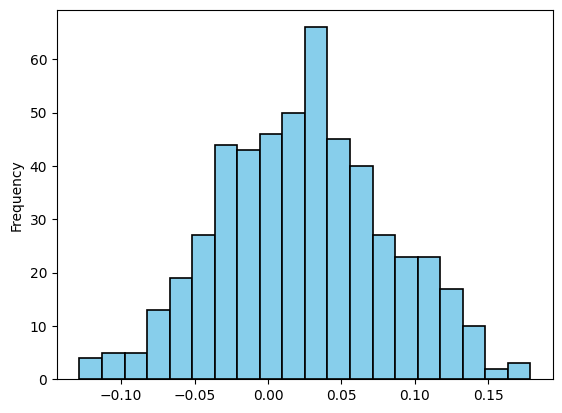

In [47]:
resul_interes['diff_ta'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', linewidth=1.2)


In [48]:
resul_interes[resul_interes['diff_ta'] < 0 ].shape

(181, 8)

In [49]:
resul_interes[resul_interes['diff_ta'] >= 0 ].shape

(331, 8)

In [50]:
resul_interes[(resul_interes['diff_ta'] >= 0) & (resul_interes['diff_ta'] <=0.04) ].shape

(140, 8)

In [84]:
df_scatter=resul_interes[['ta_original','ta_new','diff_ta','diff_pay']].copy()
df_scatter

,ta_original,ta_new,diff_ta,diff_pay
0,0.742590,0.774903,0.032312,8281.935513
1,0.720616,0.773564,0.052948,14182.989755
2,0.765798,0.787120,0.021321,4372.025745
3,0.712443,0.751869,0.039426,5707.894553
4,0.734495,0.742916,0.008421,17623.179044
...,...,...,...,...
507,0.779352,0.787995,0.008643,1945.046566
508,0.758762,0.801344,0.042582,13977.714873
509,0.744534,0.822237,0.077703,26920.384484
510,0.749142,0.787120,0.037978,27297.814278


<Axes: xlabel='ta_original', ylabel='diff_ta'>

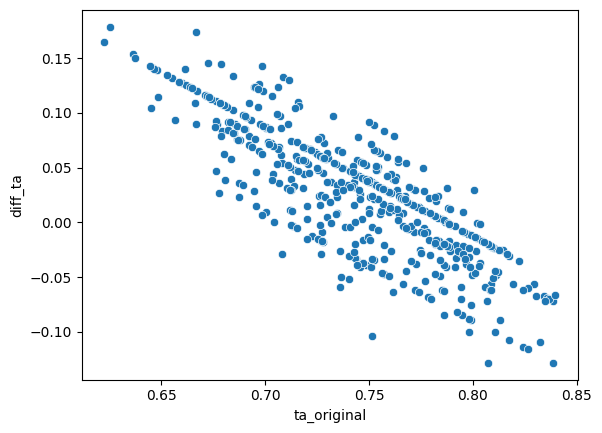

In [85]:
sns.scatterplot(data=df_scatter,
                x='ta_original',
                y='diff_ta')

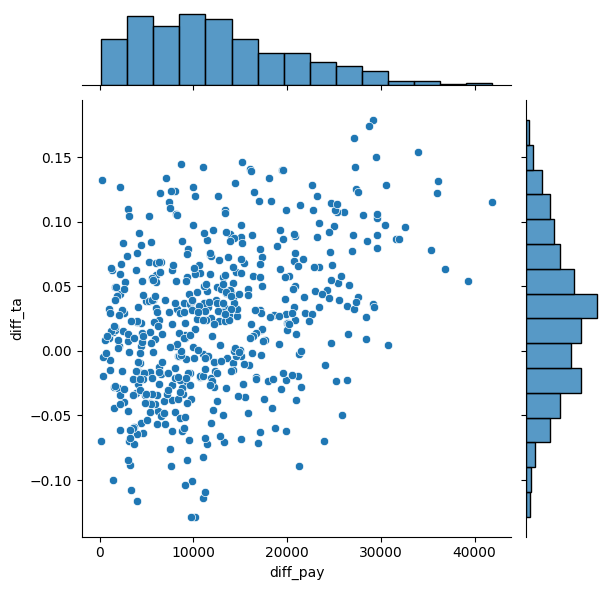

In [89]:
sns.jointplot(data=df_scatter,
                x='diff_pay',
                y='diff_ta')

In [87]:
df_scatter2=resul_interes[resul_interes['diff_ta'] >= 0][['ta_original','ta_new','diff_ta','diff_pay']].copy()
df_scatter2 = df_scatter2.reset_index(drop=True)
df_scatter2


,ta_original,ta_new,diff_ta,diff_pay
0,0.742590,0.774903,0.032312,8281.935513
1,0.720616,0.773564,0.052948,14182.989755
2,0.765798,0.787120,0.021321,4372.025745
3,0.712443,0.751869,0.039426,5707.894553
4,0.734495,0.742916,0.008421,17623.179044
...,...,...,...,...
326,0.779352,0.787995,0.008643,1945.046566
327,0.758762,0.801344,0.042582,13977.714873
328,0.744534,0.822237,0.077703,26920.384484
329,0.749142,0.787120,0.037978,27297.814278


<Axes: xlabel='ta_original', ylabel='diff_ta'>

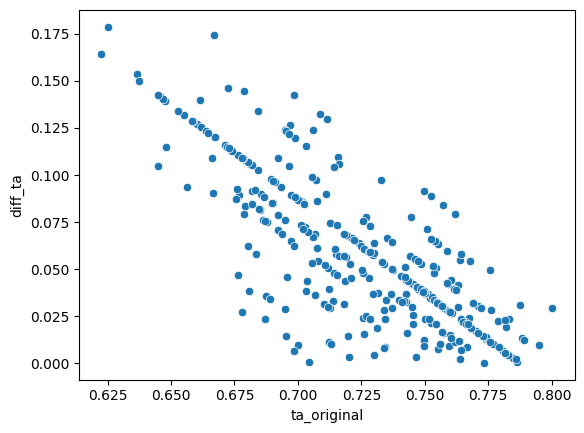

In [88]:
sns.scatterplot(data=df_scatter2,
                x='ta_original',
                y='diff_ta')

In [52]:
resul_foco= resul_interes[(resul_interes['diff_ta'] >=0) & (resul_interes['diff_ta'] <= 0.04)].copy()
resul_foco = resul_foco.reset_index(drop=True)
resul_foco

,prediction,dul_new,ta_original,payload,dul_new_normal,ta_new,diff_ta,diff_pay
0,142875.385561,0.832416,0.742590,134593.450048,5.150966e+06,0.774903,0.032312,8281.935513
1,144366.298793,0.839472,0.765798,139994.273048,5.157766e+06,0.787120,0.021321,4372.025745
2,142367.244551,0.022343,0.712443,136659.349998,4.370244e+06,0.751869,0.039426,5707.894553
3,142389.202125,0.568855,0.734495,124766.023081,4.896955e+06,0.742916,0.008421,17623.179044
4,142367.244551,-1.430360,0.713976,136375.044090,2.970177e+06,0.747098,0.033122,5992.200461
...,...,...,...,...,...,...,...,...
135,143348.467217,0.839472,0.756672,132828.939064,5.157766e+06,0.787120,0.030448,10519.528153
136,142668.395583,0.872138,0.776218,129351.093977,5.189248e+06,0.804739,0.028521,13317.301606
137,142384.270447,0.852178,0.779352,140439.223881,5.170012e+06,0.787995,0.008643,1945.046566
138,143442.730208,0.839472,0.749142,116144.915930,5.157766e+06,0.787120,0.037978,27297.814278


(0.0, 60.0)

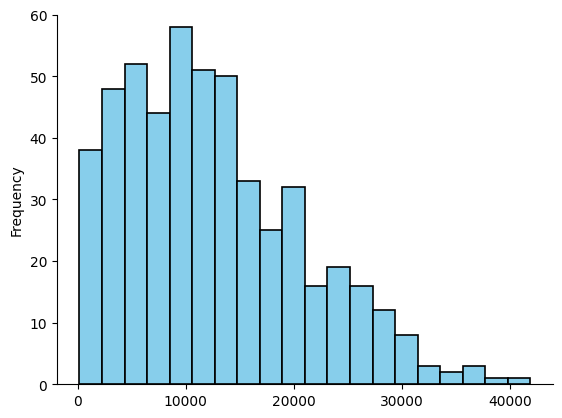

In [53]:
resul_interes['diff_pay'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', linewidth=1.2)

# mejoramos la visualización
sns.despine()
plt.ylim(0, 60)

<Axes: ylabel='Frequency'>

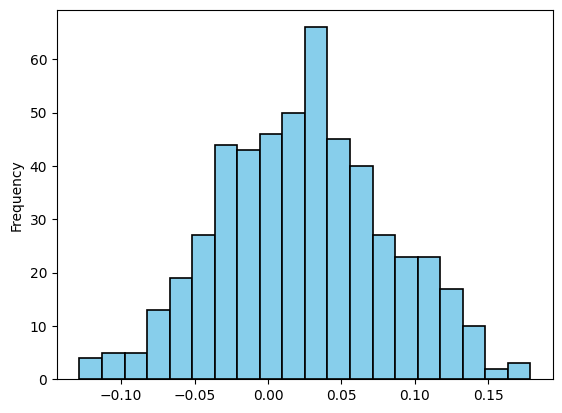

In [54]:
resul_interes['diff_ta'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', linewidth=1.2)

In [55]:
# nos concentramos en  los valores menores a 20_000
ta_foco = resul_interes[resul_interes['diff_pay'] < 20_000][['ta_original','ta_new']].copy()
ta_foco = ta_foco.reset_index(drop=True)
ta_foco

,ta_original,ta_new
0,0.742590,0.774903
1,0.720616,0.773564
2,0.765798,0.787120
3,0.712443,0.751869
4,0.734495,0.742916
...,...,...
411,0.776218,0.804739
412,0.800748,0.787120
413,0.750878,0.822237
414,0.779352,0.787995


In [56]:
normality_test(ta_foco['ta_new']), normality_test(ta_foco['ta_original'])

Distibución NO Normal, p_value: 7.555049445949475e-11 - stat: 0.9485109244322151
Distibución NO Normal, p_value: 0.012656779491219707 - stat: 0.991037747833615


(None, None)

<Axes: xlabel='ta_new', ylabel='Count'>

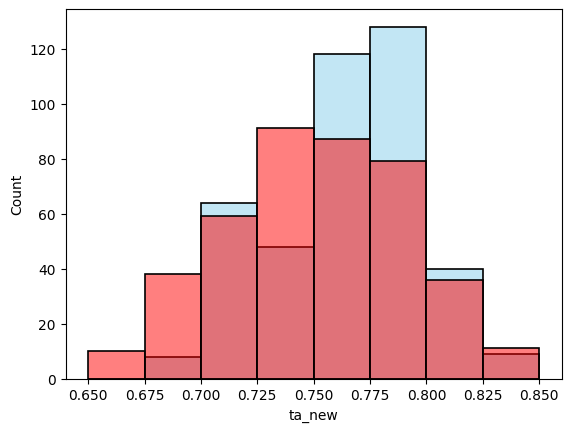

In [57]:
sns.histplot(ta_foco['ta_new'], 
             binwidth=0.025, 
             binrange=(0.650, 0.850),
             color='skyblue', 
             edgecolor='black', 
             linewidth=1.2,
             alpha=0.5)
sns.histplot(ta_foco['ta_original'], 
             binwidth=0.025, 
             binrange=(0.650, 0.850),
             color='red', 
             edgecolor='black', 
             linewidth=1.2,
             alpha=0.5)

In [58]:
# buscamos las coincidencias de las distance_up_level
coincidencia = df_com_up[df_com_up['distance_up_level'].isin(resul_interes['dul_new'])]
coincidencia = coincidencia[['distance_up_level','truck_avail']]
coincidencia = coincidencia.rename(columns={'truck_avail':'ta_new'})
coincidencia

,distance_up_level,ta_new
0,1.522682,0.841171
1,1.144239,0.822237
2,1.408364,0.807127
3,0.891184,0.818624
7,0.852178,0.787995
...,...,...
625,-1.034521,0.688605
627,-1.279719,0.747554
653,-0.842504,0.719127
690,-0.926930,0.761962


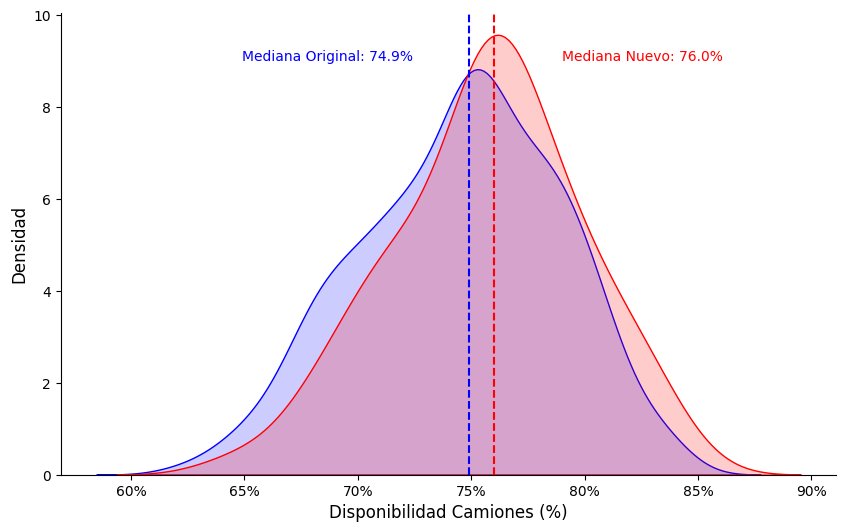

In [59]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10,6))

# Graficamos las distribuciones con estilos mejorados
sns.kdeplot(resul_interes['ta_original'], label='Original', color='blue', linewidth=1, fill=True, alpha=0.2)
sns.kdeplot(coincidencia['ta_new'], label='Nuevo', color='red', linewidth=1, fill=True, alpha=0.2)

# Mejoramos la visualización
sns.despine()

# Añadimos etiquetas de los ejes
plt.xlabel('Disponibilidad Camiones (%)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Formato del eje x en porcentaje
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ajustamos el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculamos la media de cada distribución
mediana_original = resul_interes['ta_original'].median()
mediana_nueva = coincidencia['ta_new'].median()

# Añadimos líneas verticales en las medias
plt.axvline(mediana_original, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(mediana_nueva, color='red', linestyle='--', linewidth=1.5)

# Añadimos texto con las medias
plt.text(mediana_original - 0.1, 9, f'Mediana Original: {mediana_original:.1%}', fontsize=10, color='blue')
plt.text(mediana_nueva + 0.03, 9, f'Mediana Nuevo: {mediana_nueva:.1%}', fontsize=10, color='red')

# Mostramos el gráfico
plt.show()

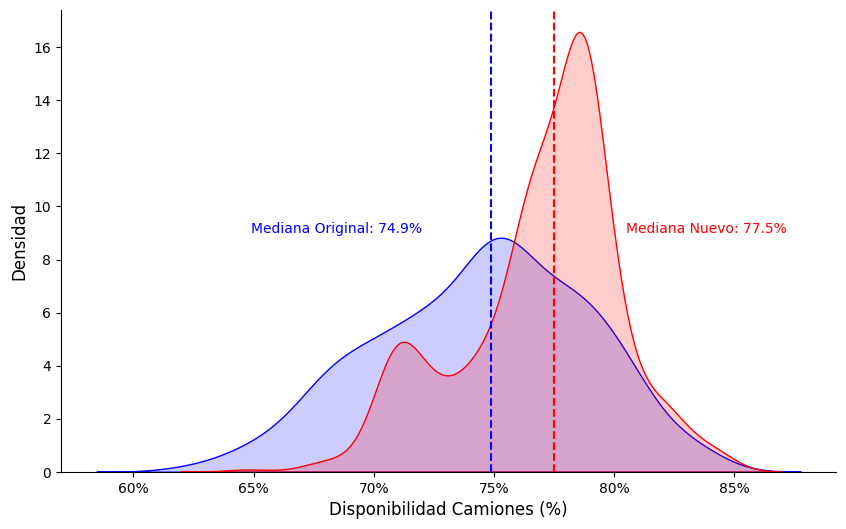

In [60]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10,6))

# Graficamos las distribuciones con estilos mejorados
sns.kdeplot(resul_interes['ta_original'], label='Original', color='blue', linewidth=1, fill=True, alpha=0.2)
sns.kdeplot(resul_interes['ta_new'], label='Nuevo', color='red', linewidth=1, fill=True, alpha=0.2)

# Mejoramos la visualización
sns.despine()

# Añadimos etiquetas de los ejes
plt.xlabel('Disponibilidad Camiones (%)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Formato del eje x en porcentaje
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ajustamos el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculamos la media de cada distribución
mediana_original = resul_interes['ta_original'].median()
mediana_nueva = resul_interes['ta_new'].median()

# Añadimos líneas verticales en las medias
plt.axvline(mediana_original, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(mediana_nueva, color='red', linestyle='--', linewidth=1.5)

# Añadimos texto con las medias
plt.text(mediana_original - 0.1, 9, f'Mediana Original: {mediana_original:.1%}', fontsize=10, color='blue')
plt.text(mediana_nueva + 0.03, 9, f'Mediana Nuevo: {mediana_nueva:.1%}', fontsize=10, color='red')

# Mostramos el gráfico
plt.show()

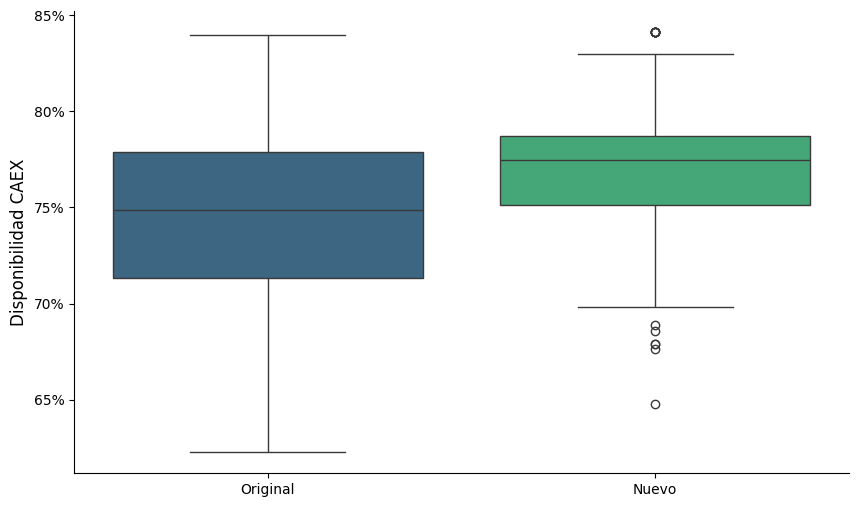

In [61]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10,6))

# Graficamos las distribuciones con estilos mejorados
sns.boxplot(data=resul_interes[['ta_original', 'ta_new']], palette='viridis')

# Mejoramos la visualización
sns.despine()

# Añadimos etiquetas de los ejes
plt.ylabel('Disponibilidad CAEX', fontsize=12)

# Formato del eje x en porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ajustamos el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10, ticks=[0, 1], labels=['Original', 'Nuevo'])
plt.yticks(fontsize=10)

# Mostramos el gráfico
plt.show()

<Axes: xlabel='distance_up_level', ylabel='Density'>

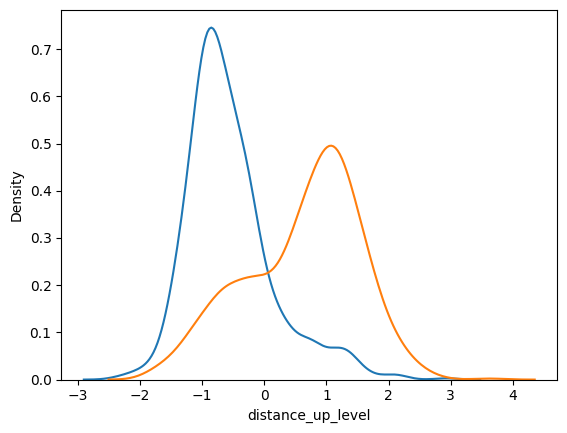

In [62]:
# graficamos las distance_up_level bajo y sobre la media
sns.kdeplot(df_com_down.distance_up_level)
sns.kdeplot(df_com_up.distance_up_level)

<Axes: xlabel='truck_avail', ylabel='Density'>

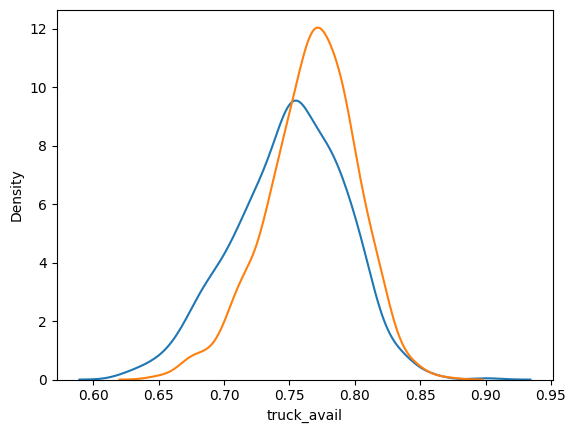

In [63]:
# graficamos las distance_up_level bajo y sobre la media
sns.kdeplot(df_com_down.truck_avail)
sns.kdeplot(df_com_up.truck_avail)

In [64]:
normality_test(df_com_down.truck_avail)

Distibución NO Normal, p_value: 0.0009287060254033248 - stat: 0.9932955760796902


In [65]:
normality_test(df_com_up.truck_avail)

Distibución NO Normal, p_value: 0.00011903874885663597 - stat: 0.9906550169772343


In [66]:
df_com_down.truck_avail.describe()

count    825.000000
mean       0.750071
std        0.042238
min        0.622591
25%        0.722733
50%        0.753218
75%        0.780806
max        0.901208
Name: truck_avail, dtype: float64

In [67]:
df_com_up.truck_avail.describe()

count    742.000000
mean       0.766788
std        0.034421
min        0.647743
25%        0.746517
50%        0.769304
75%        0.790458
max        0.870017
Name: truck_avail, dtype: float64